In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load Dataset
df = pd.read_csv('KlasifikasiUTS.csv')
print("Data Shape:", df.shape)
df.head()

Data Shape: (122881, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# 3. Cek Missing Value
print("\nMissing Values:\n", df.isnull().sum())

# 4. Drop Duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Shape after removing duplicates: (122408, 31)


In [14]:
# 5. Pisahkan fitur dan target
X = df.drop('Class', axis=1) # Ganti 'target' dengan nama kolom target sebenarnya jika beda
y = df['Class']

# Tangani missing value di target
print("Missing value di target sebelum diisi:", y.isnull().sum())
X = X[y.notnull()]
y = y[y.notnull()]
print("Missing value di target setelah diisi:", y.isnull().sum())


Missing value di target sebelum diisi: 1
Missing value di target setelah diisi: 0


In [15]:
# 6. Encoding Categorical Features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Encoding pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [16]:
# 7. Feature Selection

# 7a. Remove Constant & Quasi-Constant Features
selector = VarianceThreshold(threshold=0.01)
X_temp = selector.fit_transform(preprocessor.fit_transform(X))

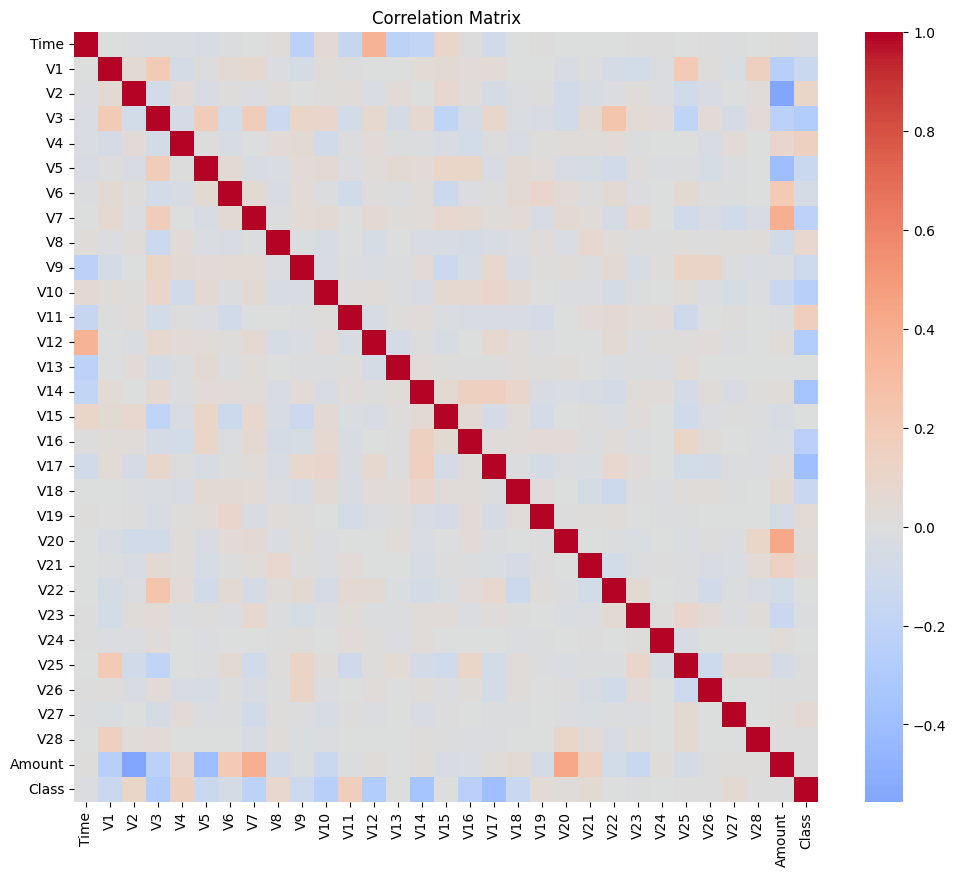

In [17]:
# 7b. Correlation (for numerical only)
if len(numerical_cols) > 1:
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()



In [18]:
# 7c. Mutual Information
mi_scores = mutual_info_classif(preprocessor.fit_transform(X), y)
print("\nMutual Information Scores:\n", mi_scores)


Mutual Information Scores:
 [0.00138801 0.00282372 0.00407359 0.00585965 0.00645376 0.00351251
 0.00322834 0.00494082 0.00252644 0.00525073 0.00881714 0.00803007
 0.00894962 0.00027672 0.00947524 0.00015102 0.00763698 0.00991506
 0.00574735 0.00171579 0.00147173 0.00356426 0.00010842 0.0010582
 0.00068227 0.00094361 0.00062564 0.00335925 0.00268961 0.00217194]


In [20]:
# 7d. Chi-Square (for classification)
from sklearn.preprocessing import MinMaxScaler

# Pipeline khusus untuk Chi2: gunakan MinMaxScaler agar data >= 0
chi2_preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_chi2 = chi2_preprocessor.fit_transform(X)

chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_chi2, y)
print("\nChi2 Scores:\n", chi_selector.scores_)



Chi2 Scores:
 [4.38161051e+00 2.22346177e+00 5.62400079e-01 1.08227666e+01
 4.29815872e+01 1.14565822e+00 5.85180408e-01 3.84930586e+00
 1.89448514e-01 7.58332073e+00 1.10167938e+01 5.72695594e+01
 2.41004643e+01 8.02417685e-03 2.29896851e+01 5.91482230e-03
 1.98711739e+01 1.75579818e+01 1.32418113e+01 1.85524856e+00
 1.62628375e-02 7.86160045e-02 7.37258693e-04 2.78551033e-03
 1.46962036e-01 6.79387627e-03 3.73169232e-02 7.89203094e-02
 1.54540748e-03 1.03435635e-01]


In [21]:
# 7e. ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(preprocessor.fit_transform(X), y)
print("\nANOVA F-test Scores:\n", anova_selector.scores_)


ANOVA F-test Scores:
 [4.34398905e+01 2.23478555e+03 1.43117027e+03 1.05415554e+04
 2.88310298e+03 2.13299998e+03 4.49882298e+02 6.29950082e+03
 9.19957309e+02 1.47862658e+03 8.33984804e+03 3.64333311e+03
 1.07350873e+04 4.62943606e-01 1.72407365e+04 2.96451794e-01
 7.14026561e+03 2.18837926e+04 2.62300294e+03 2.52530332e+02
 3.82468001e+01 3.43005209e+02 4.24495048e-01 2.13875837e+01
 8.10837252e+00 5.81350800e+00 2.39644045e+00 4.18398872e+02
 8.45407895e+00 2.93197803e+00]


In [22]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 9. Modeling: Logistic Regression, Decision Tree, KNN, Bagging, Boosting, SVM
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(n_estimators=50),
    'Boosting': AdaBoostClassifier(n_estimators=50),
    'SVM': SVC(probability=True)
}


In [24]:
# 10. Evaluation Metrics Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    if y_proba is not None and len(np.unique(y_test)) == 2: # ROC only for binary
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
        print("AUC Score:", auc_score)
    else:
        print("ROC Curve not available (multi-class or no probability output).")

    return acc, prec, rec, f1


--- Logistic Regression ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       0.82      0.57      0.67        58

    accuracy                           1.00     24482
   macro avg       0.91      0.78      0.84     24482
weighted avg       1.00      1.00      1.00     24482



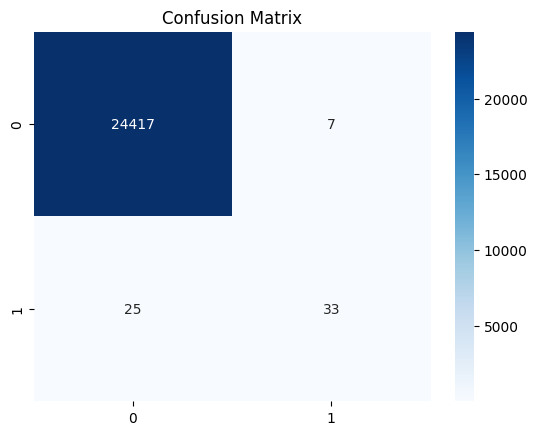

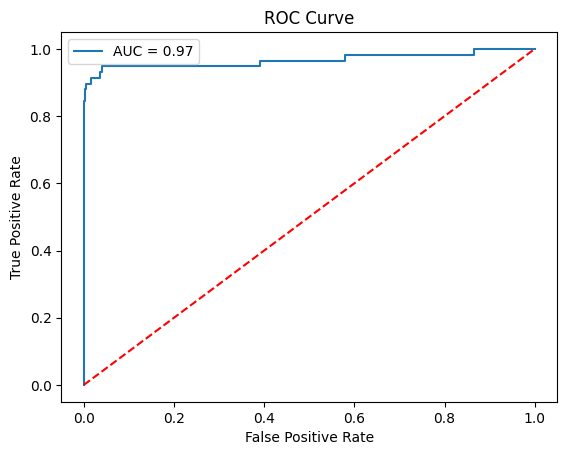

AUC Score: 0.9664857630143329

--- Decision Tree ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       0.75      0.72      0.74        58

    accuracy                           1.00     24482
   macro avg       0.87      0.86      0.87     24482
weighted avg       1.00      1.00      1.00     24482



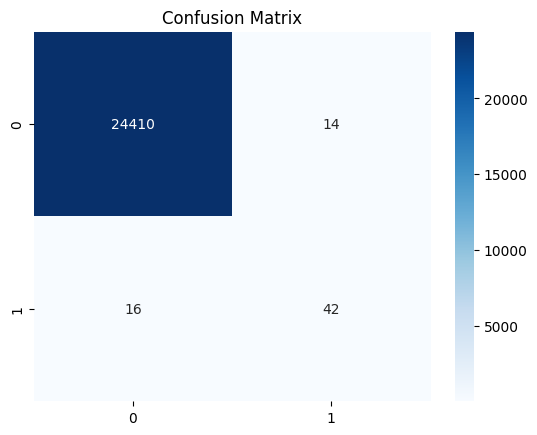

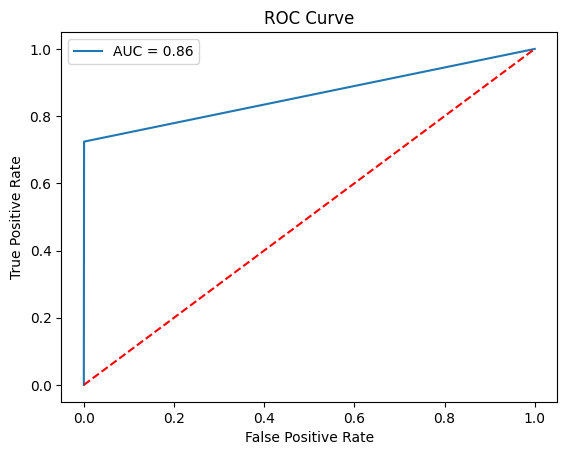

AUC Score: 0.8617823621762652

--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       0.98      0.81      0.89        58

    accuracy                           1.00     24482
   macro avg       0.99      0.91      0.94     24482
weighted avg       1.00      1.00      1.00     24482



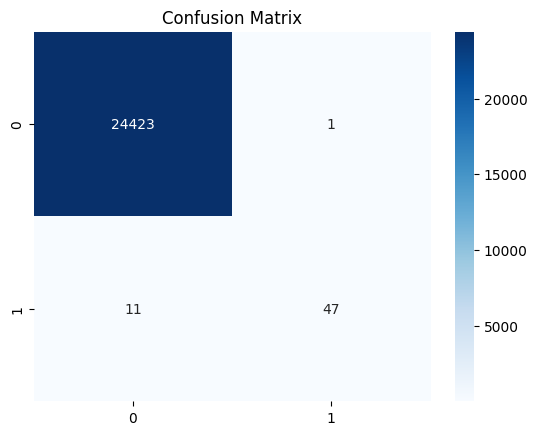

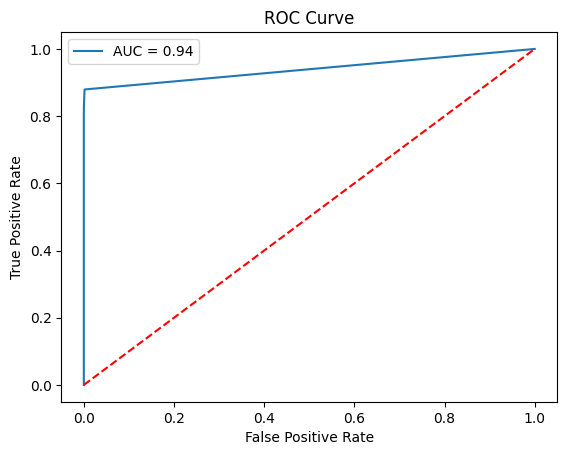

AUC Score: 0.9395101059444074

--- Bagging ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       0.98      0.83      0.90        58

    accuracy                           1.00     24482
   macro avg       0.99      0.91      0.95     24482
weighted avg       1.00      1.00      1.00     24482



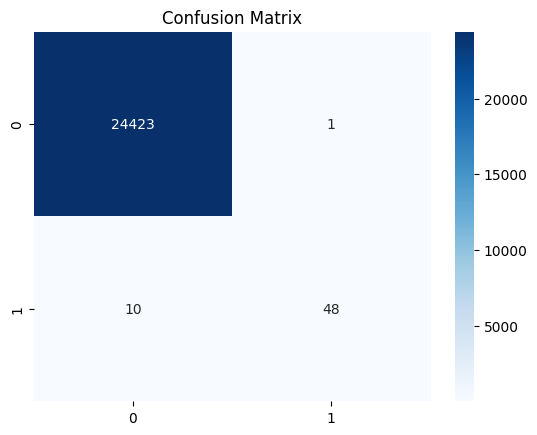

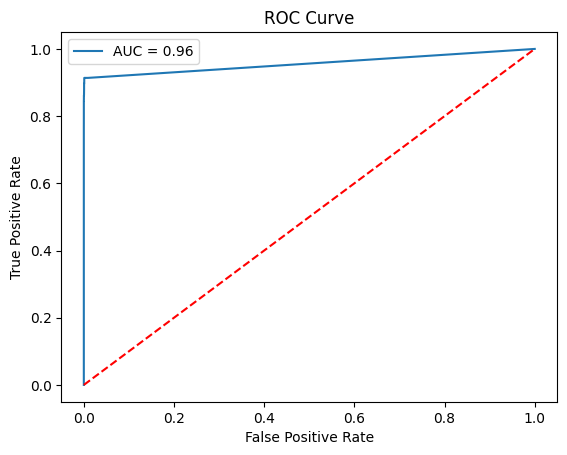

AUC Score: 0.9564609993562013

--- Boosting ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       0.81      0.81      0.81        58

    accuracy                           1.00     24482
   macro avg       0.90      0.90      0.90     24482
weighted avg       1.00      1.00      1.00     24482



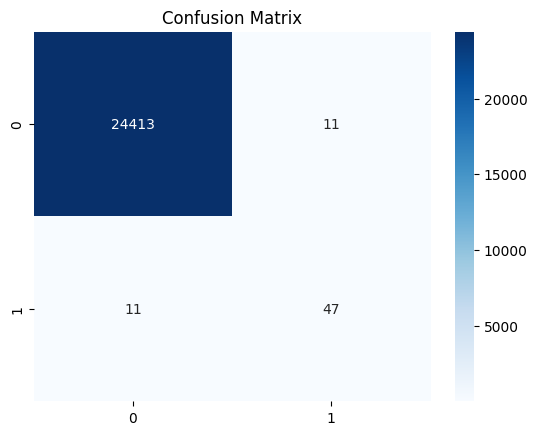

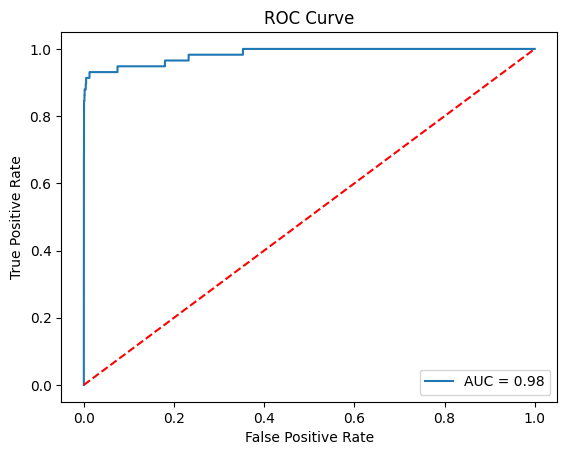

AUC Score: 0.984974502185527

--- SVM ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24424
         1.0       1.00      0.74      0.85        58

    accuracy                           1.00     24482
   macro avg       1.00      0.87      0.93     24482
weighted avg       1.00      1.00      1.00     24482



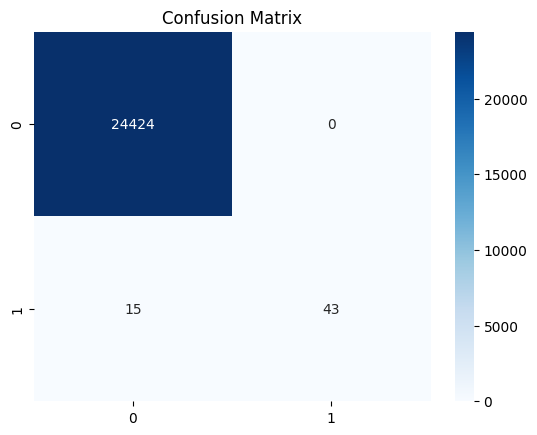

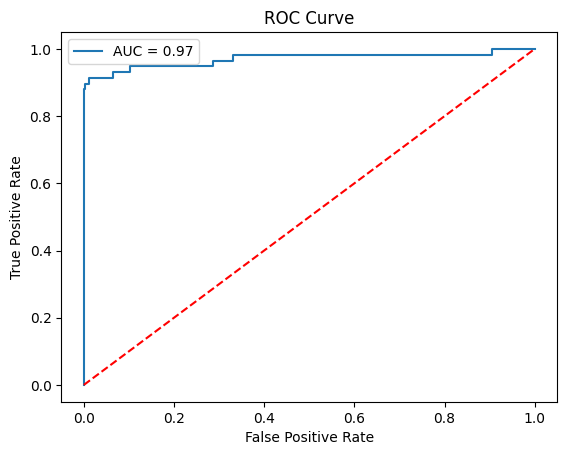

AUC Score: 0.9705878615719981


In [25]:
# 11. Run All Models
results = {}
for name, model in models.items():
    print(f"\n--- {name} ---")
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('selector', selector),
                           ('classifier', model)])
    pipe.fit(X_train, y_train)
    acc, prec, rec, f1 = evaluate_model(pipe, X_test, y_test)
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}


In [26]:
# 12. Compare All Models
result_df = pd.DataFrame(results).T
print("\n--- Model Comparison ---")
print(result_df)


--- Model Comparison ---
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.998693   0.998565  0.998693  0.998573
Decision Tree        0.998775   0.998754  0.998775  0.998764
K-Nearest Neighbors  0.999510   0.999502  0.999510  0.999487
Bagging              0.999551   0.999543  0.999551  0.999532
Boosting             0.999101   0.999101  0.999101  0.999101
SVM                  0.999387   0.999388  0.999387  0.999342
